# Algorithm steps:

1. calculate the error;
2. calculate the new slope and linear coefficients;
3. update slope and linear coefficient;
4. returns to step 1 if the number of epochs has not yet been completed;

### 1. Calculate the error

Error function: $ \dfrac{1}{n} \sum_{i=0}^{n} (y - (mx_i + b))^2 $

### 2. calculate the new slope and linear coefficients


Derived from the error function with respect to the slope:

$ \dfrac{\partial E}{\partial m} = -\dfrac{2}{n} \sum_{i=0}^{n} x_i(y - (mx_i + b))$

Derived from the error function with respect to the linear coefficient:

$ \dfrac{\partial E}{\partial b} = -\dfrac{2}{n} \sum_{i=0}^{n}(y - (mx_i + b))$

### 3. update slope and linear coefficient

$m_{i+1} = m_{i} - r\dfrac{\partial E}{\partial m} $

$b_{i+1} = b_{i} - r.\dfrac{\partial E}{\partial b} $

# Dataset

https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression

In [1]:
class LinearRegression(object):

    def __init__(self, x: list, y: list, learning_rate: float, epochs: int):
        self.xy = [x, y]
        self.epochs = epochs
        self.points = self.formatting_data(x, y)
        self.m = (sum(y) / len(y)) / (sum(x) / len(x))
        self.b = sum(y) / len(y)
        self.ds = 0
        self.db = 0
        self.r = learning_rate
        self.error = 1
        
    def formatting_data(self, x: list, y: list):
        
        return [[mx, my] for mx, my in zip(x, y)]

    def straight_line(self, x: float):

        return self.m*x + self.b
        
    def derivatives(self):
        
        self.m = self.m - self.r * (-2 / len(self.points)) * self.ds
        self.b = self.b - self.r * (-2 / len(self.points)) * self.db
        
    def MSE(self):
        
        s = sum([(self.points[i][1] - self.straight_line(self.points[i][0]))** 2 for i in range(len(self.points))])
        self.ds = sum([self.points[i][0] * (self.points[i][1] - self.straight_line(self.points[i][0])) for i in range(len(self.points))])
        self.db = sum([self.points[i][1] - self.straight_line(self.points[i][0]) for i in range(len(self.points))])
        self.error = s * (1 / len(self.points))
        return self.error
    
    def plot(self):
        plt.scatter(self.xy[0], self.xy[1], color='orange')
        plt.plot(list(range(0, int(max(self.xy[0])))), [self.m * x + self.b for x in range(0, int(max(self.xy[0])))], color='blue')
        plt.show()
        
    def fit(self):
        
        for i in range(self.epochs):
            self.MSE()
            self.derivatives()
        
        print('Straight Line: {:.2f}x + {:.2f}'.format(self.m, self.b))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#### Importing the dataset

In [3]:
data = pd.read_csv('Salary_Data.csv', delimiter=',')

#### Separating data into X and Y

In [4]:
X = data.iloc[1:, 0].values
Y = data.iloc[1:, 1].values

In [5]:
X

array([ 1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,  4. ,
        4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,
        8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [6]:
Y

array([ 46205.,  37731.,  43525.,  39891.,  56642.,  60150.,  54445.,
        64445.,  57189.,  63218.,  55794.,  56957.,  57081.,  61111.,
        67938.,  66029.,  83088.,  81363.,  93940.,  91738.,  98273.,
       101302., 113812., 109431., 105582., 116969., 112635., 122391.,
       121872.])

#### Instantiating a linear regression class object

In [7]:
lr = LinearRegression(x=X, y=Y, learning_rate=0.001, epochs=10000)

In [8]:
lr.fit()

Straight Line: 9364.78x + 26345.72


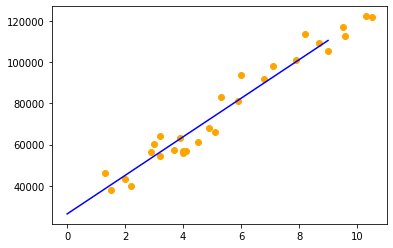

In [9]:
lr.plot()